In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("creditcard.csv")

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [14]:
fraud = data[data["Class"]== 1]
valid = data[data["Class"]== 0]

outlierFraction = len(fraud)/float(len(valid))

print(outlierFraction)
print(len(fraud))
print(len(valid))

0.0017304750013189597
492
284315


In [19]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [20]:
valid.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [21]:
# It clearly states that mean transaction in fraud is more than that of valid

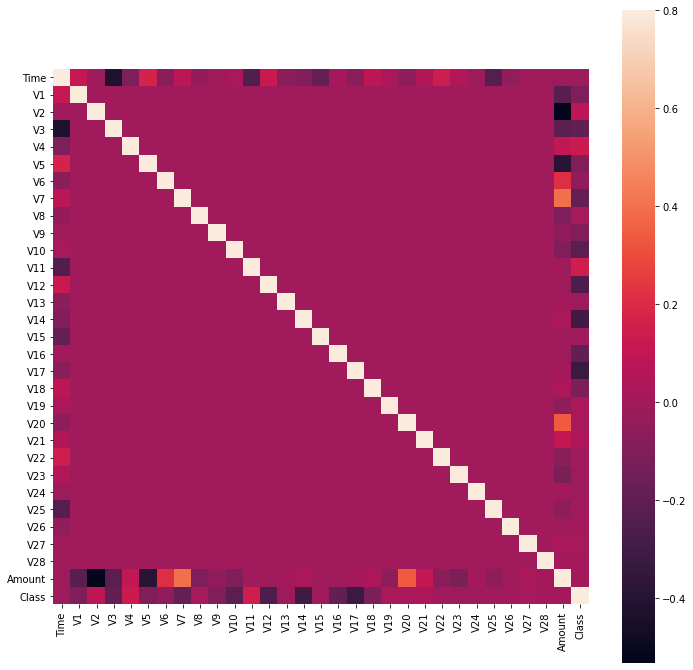

In [22]:
corrmat = data.corr()
fig = plt.figure(figsize = (12,12))
sns.heatmap(corrmat, vmax = 0.8, square = True)
plt.show()

In [23]:
x = data.drop(["Class"], axis = 1)
y = data["Class"]

#Convert to Numpy Array
xdata = x.values
ydata = y.values

In [24]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, test_size=0.2, random_state=42)

In [26]:
from sklearn.ensemble import RandomForestClassifier

rfc =RandomForestClassifier()

rfc.fit(xtrain, ytrain)

RandomForestClassifier()

In [27]:
ypred =rfc.predict(xtest)

In [28]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

acc = accuracy_score(ytest, ypred)
prec = precision_score(ytest, ypred)
rec = recall_score(ytest, ypred)
f1 = f1_score(ytest, ypred)

print("Accuracy ", acc)
print("Precsion ", prec)
print("Recall_score ", rec)
print("F1_score ", f1_score)

Accuracy  0.9995611109160493
Precsion  0.974025974025974
Recall_score  0.7653061224489796
F1_score  <function f1_score at 0x0000029AAAF34040>


# Accuracy : 99.95%
# Precision : 97.40%